Tasks
1. Load the dataset, check its shape, Perform EDA using Pandas Profilin
2. Rectify the data of Þrst four columns
3. Create new features using the 'Data' feature and the make 'Data' column as index 
4. Handle null and duplicate values 
5. Check the data-type of the features and convert them to appropriate data-type 
6. Analyze features with outlier values 
7. Plot and analyze Correlation 
8. Split the dataset for training and testing
9. Train a linear regression model and print the intercept and coefficients 
10. Evaluate the model using R2 score, Mean Absolute Error, and root mean squared error. 


In [ ]:
#REQUIRED LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

In [ ]:
#LOAD THE DATASET

df = pd.read_csv('/content/drive/MyDrive/Datasets/Consumo_cerveja.csv', parse_dates=['Data'])
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_file("your_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/scipy/cluster/hierarchy.py:2848: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([dvw, 0])


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df = df.rename(columns={'Temperatura Media (C)': 'Temperature Media (C)', 'Temperatura Minima (C)': 'Temperature Minimum (C)',
                        'Temperatura Maxima (C)': 'Temperature Maximum (C)', 'Precipitacao (mm)':'Precipitation (mm)',
                        'Final de Semana' : 'at the weekend', 'Consumo de cerveja (litros)': 'beer consumption (litres)'})

In [ ]:
df.head()

,Data,Temperature Media (C),Temperature Minimum (C),Temperature Maximum (C),Precipitation (mm),at the weekend,beer consumption (litres)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


We can see from pandas proÞling column number 2 to 5 seems to have inappropriate values. Instead of
'.' they have ','. The columns are also having categorical values instead of continuous numerical values

In [ ]:
#QUESTION - 2:- Rectify the data

#Replace ',' with '.' in columns 'Temperatura Media (C)', 'Temperatura Minima (C)',
#'Temperatura Maxima (C)', and 'Precipitacao (mm)'.


df['Temperature Media (C)'] = df['Temperature Media (C)'].str.replace(',','.')
df['Temperature Minimum (C)'] = df['Temperature Minimum (C)'].str.replace(',','.')
df['Temperature Maximum (C)'] = df['Temperature Maximum (C)'].str.replace(',','.')
df['Precipitation (mm)'] = df['Precipitation (mm)'].str.replace(',','.')

In [ ]:
df.head()

,Data,Temperature Media (C),Temperature Minimum (C),Temperature Maximum (C),Precipitation (mm),at the weekend,beer consumption (litres)
0,2015-01-01,27.3,23.9,32.5,0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21,28.3,0,0.0,28.900


In [ ]:
df.tail()

,Data,Temperature Media (C),Temperature Minimum (C),Temperature Maximum (C),Precipitation (mm),at the weekend,beer consumption (litres)
936,NaT,NaN,NaN,NaN,NaN,NaN,NaN
937,NaT,NaN,NaN,NaN,NaN,NaN,NaN
938,NaT,NaN,NaN,NaN,NaN,NaN,NaN
939,NaT,NaN,NaN,NaN,NaN,NaN,NaN
940,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.isna().sum()

Data                         576
Temperature Media (C)        576
Temperature Minimum (C)      576
Temperature Maximum (C)      576
Precipitation (mm)           576
at the weekend               576
beer consumption (litres)    576
dtype: int64

In [ ]:
#Question-3: Create new features using the 'Data' feature and the make 'Data' column as index

#Create new feature 'Month' from the dates, consisting of the month of the year
#Create new feature 'Day' from the dates, consisting of the day of the week
#Set values from 'Data' column as indexes

df['Month']=df.Data.dt.month
df['day']=df.Data.dt.dayofweek
df.iloc[335:341]  #Just some random values to check

,Data,Temperature Media (C),Temperature Minimum (C),Temperature Maximum (C),Precipitation (mm),at the weekend,beer consumption (litres),Month,day
335,2015-12-02,22.1,18.2,29.4,0,0.0,30.471,12.0,2.0
336,2015-12-03,22.44,20.2,26.1,0,0.0,28.405,12.0,3.0
337,2015-12-04,22.76,19,29.1,0,0.0,29.513,12.0,4.0
338,2015-12-05,24.8,19.5,30.6,0.1,1.0,32.451,12.0,5.0
339,2015-12-06,23.12,20.6,28,0.1,1.0,32.780,12.0,6.0
340,2015-12-07,20.04,18,23.9,47.8,0.0,23.375,12.0,0.0


In [ ]:
df.loc[341]

Data                         2015-12-08 00:00:00
Temperature Media (C)                       21.7
Temperature Minimum (C)                       18
Temperature Maximum (C)                       28
Precipitation (mm)                             0
at the weekend                               0.0
beer consumption (litres)                 27.713
Month                                       12.0
day                                          1.0
Name: 341, dtype: object

In [ ]:
df.set_index('Data',inplace=True)

In [ ]:
df.head()

,Temperature Media (C),Temperature Minimum (C),Temperature Maximum (C),Precipitation (mm),at the weekend,beer consumption (litres),Month,day
Data,,,,,,,,
2015-01-01,27.3,23.9,32.5,0,0.0,25.461,1.0,3.0
2015-01-02,27.02,24.5,33.5,0,0.0,28.972,1.0,4.0
2015-01-03,24.82,22.4,29.9,0,1.0,30.814,1.0,5.0
2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,1.0,6.0
2015-01-05,23.82,21,28.3,0,0.0,28.900,1.0,0.0


In [ ]:
# HANDLE NULL VALUES

print(df.isna().sum())
df.shape

Temperature Media (C)        576
Temperature Minimum (C)      576
Temperature Maximum (C)      576
Precipitation (mm)           576
at the weekend               576
beer consumption (litres)    576
Month                        576
day                          576
dtype: int64


(941, 8)

In [ ]:
941-576

365

In [ ]:
df.iloc[363:367]

,Temperature Media (C),Temperature Minimum (C),Temperature Maximum (C),Precipitation (mm),at the weekend,beer consumption (litres),Month,day
Data,,,,,,,,
2015-12-30,21.38,19.3,22.4,6.3,0.0,20.467,12.0,2.0
2015-12-31,24.76,20.2,29,0,0.0,22.446,12.0,3.0
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(df.isnull().all(axis=1).sum())
#Number of rows which have null values in all columns

576


In [ ]:
df.dropna(how='all',inplace=True)
#Dropping all null values

In [ ]:
df.shape

(365, 8)

In [ ]:
#Check whether there are still any null values

df.isna().sum()

Temperature Media (C)        0
Temperature Minimum (C)      0
Temperature Maximum (C)      0
Precipitation (mm)           0
at the weekend               0
beer consumption (litres)    0
Month                        0
day                          0
dtype: int64

Now, we have handled all the null values and we dont have any  null values

In [ ]:
#Check for 'duplicated' values

if df.duplicated().any():
  print('True: duplicate instances')
else:
  print('False: No duplicate instances')

False: No duplicate instances


In [ ]:
#Question-5: Handle data types of each features

#Checking for the datatype

df.dtypes

Temperature Media (C)         object
Temperature Minimum (C)       object
Temperature Maximum (C)       object
Precipitation (mm)            object
at the weekend               float64
beer consumption (litres)    float64
Month                        float64
day                          float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2015-01-01 to 2015-12-31
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Temperature Media (C)      365 non-null    object 
 1   Temperature Minimum (C)    365 non-null    object 
 2   Temperature Maximum (C)    365 non-null    object 
 3   Precipitation (mm)         365 non-null    object 
 4   at the weekend             365 non-null    float64
 5   beer consumption (litres)  365 non-null    float64
 6   Month                      365 non-null    float64
 7   day                        365 non-null    float64
dtypes: float64(4), object(4)
memory usage: 25.7+ KB


Some columns have 'object' datatype, which needs to be converted to their appropriate data type

In [ ]:
df['Temperature Media (C)'] = df['Temperature Media (C)'].astype(float)
df['Temperature Minimum (C)'] = df['Temperature Minimum (C)'].astype(float)
df['Temperatura Maximum (C)'] = df['Temperature Maximum (C)'].astype(float)
df['Precipitation (mm)'] = df['Precipitation (mm)'].astype(float)
# Final de semana is a categorical column(like yes or no) so it should be int, not float
df['at the weekend'] = df['at the weekend'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2015-01-01 to 2015-12-31
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Temperature Media (C)      365 non-null    float64
 1   Temperature Minimum (C)    365 non-null    float64
 2   Temperature Maximum (C)    365 non-null    object 
 3   Precipitation (mm)         365 non-null    float64
 4   at the weekend             365 non-null    int64  
 5   beer consumption (litres)  365 non-null    float64
 6   Month                      365 non-null    float64
 7   day                        365 non-null    float64
 8   Temperatura Maximum (C)    365 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 28.5+ KB


In [ ]:
df.describe()

,Temperature Media (C),Temperature Minimum (C),Precipitation (mm),at the weekend,beer consumption (litres),Month,day,Temperatura Maximum (C)
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.0,365.000000
mean,21.226356,17.461370,5.196712,0.284932,25.401367,6.526027,3.0,26.611507
std,3.180108,2.826185,12.417844,0.452001,4.399143,3.452584,2.0,4.317366
min,12.900000,10.600000,0.000000,0.000000,14.343000,1.000000,0.0,14.500000
25%,19.020000,15.300000,0.000000,0.000000,22.008000,4.000000,1.0,23.800000
50%,21.380000,17.900000,0.000000,0.000000,24.867000,7.000000,3.0,26.900000
75%,23.280000,19.600000,3.200000,1.000000,28.631000,10.000000,5.0,29.400000
max,28.860000,24.500000,94.800000,1.000000,37.937000,12.000000,6.0,36.500000


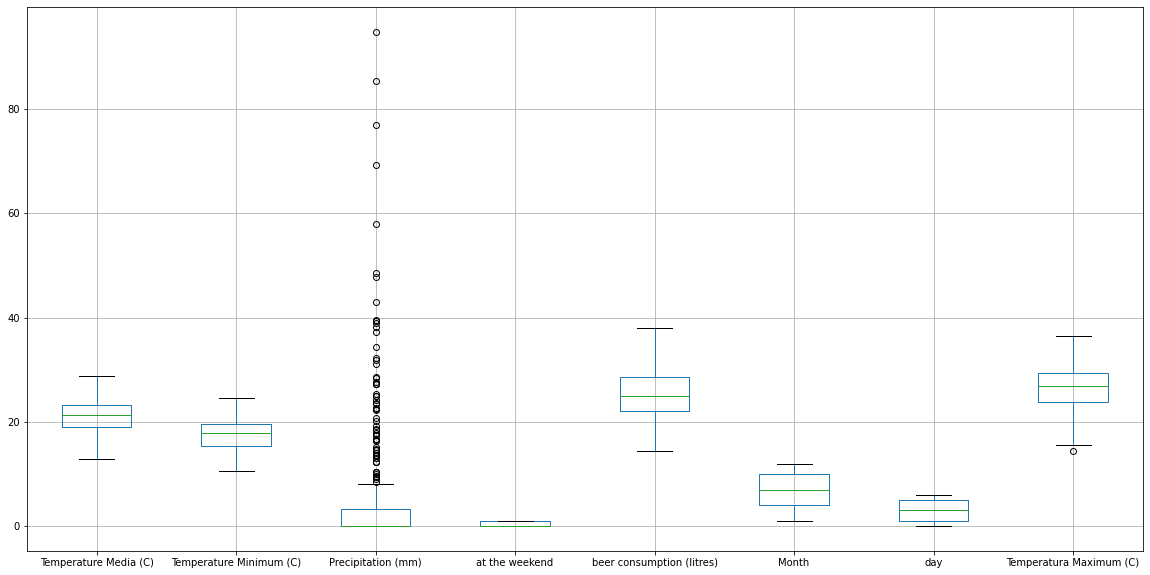

In [ ]:
#Question-6: Handle Outlier Data
#Analyse the Outliers

df.boxplot(figsize=(20,10))
plt.show()

Column 'Precipitation (mm)' has many outliers.

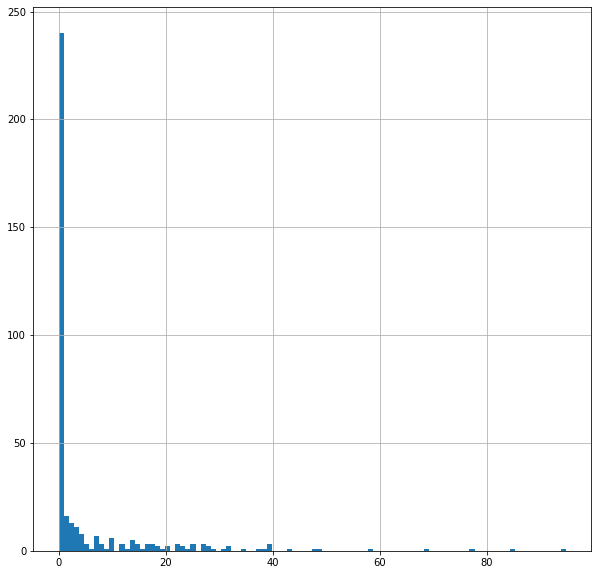

In [ ]:
#Distrbution of the Precipitation column

df['Precipitation (mm)'].hist(bins=100,figsize=(10,10))
plt.show()

In [ ]:
print(df['Precipitation (mm)'][df['Precipitation (mm)']==0].value_counts())

0.0    218
Name: Precipitation (mm), dtype: int64


Out of 365 values, 218 values are 0

We can see how the data is largely skewed, thus having so many outliers. It can also be possible that the
values with 0 percipitation are the instance where percipitation was not recorded. Lets clip all the values
over 40 in column 'Precipitation (mm)' to 40.

In [ ]:
df['Precipitation (mm)'] = np.clip(df['Precipitation (mm)'], 0, 40)

<Axes: >

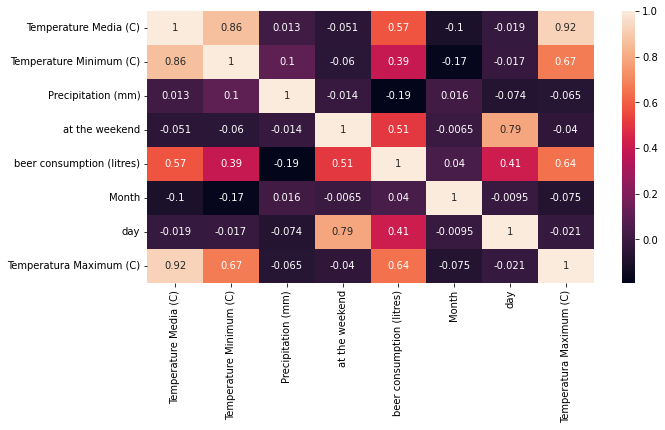

In [ ]:
#Question 7: Calculate correlation and compare

#We use the library-seaborn and the function-heatmap
plt.figure(figsize=(10,5))
correlation = df.corr()
sns.heatmap(correlation, annot=True)

All the features are showing high correlation with the output feature except 'Month' feature. In case of
'Precipitation (mm)' feature, which has lots of values as 0, still it is showing quite good correlation, so we
will keep it

In [ ]:
# Question 8: Split the dataset into training and testing

X = df.drop(columns=['beer consumption (litres)'],axis=1)
y = df['beer consumption (litres)']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=7)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(292, 8)
(73, 8)
(292,)
(73,)


In [ ]:
#Question 9: Train the model

lr = LinearRegression()
lr.fit(X_train,y_train)

print('The final coefficients after training is:',lr.coef_)
print('The final intercept after training is:',lr.intercept_)

The final coefficients after training is: [-1.34341349e-01  1.22055186e-01  3.51652558e-01 -5.80658209e-02
  5.24988993e+00  1.36610989e-01  2.42604471e-03  3.51652558e-01]
The final intercept after training is: 5.29911905706842


In [ ]:
#Prediction data
y_pred = lr.predict(X_test)
print(y_pred)

[23.19190743 29.30939949 30.00158823 31.64146095 28.56459751 25.24517037
 23.68271522 20.137103   22.85765217 25.91520632 27.48733777 32.12089459
 23.32465602 24.2108779  19.72922285 24.74648058 25.04110757 25.27381225
 18.68289008 21.66110264 20.39753515 25.7389787  26.47271729 33.36586474
 26.81074135 27.12732553 23.25791374 27.51910977 30.14770456 25.36780634
 21.77863476 25.82116835 27.74677797 26.87293403 25.39381106 22.31136569
 22.20812712 30.37999455 20.24217936 20.37167907 25.24254026 27.34158177
 30.92226058 24.41091216 21.71682874 18.7159821  23.00604945 27.04168556
 26.16123689 22.38930908 23.57382023 20.27508949 17.19513045 29.87338596
 27.74392224 22.82527993 23.18195324 28.39986788 23.53256669 19.8141523
 22.93461428 26.88388217 23.36822407 21.78554273 23.86383021 23.11586184
 26.90972676 24.43154705 27.4891648  22.69337894 25.14057455 22.14089846
 29.22437167]


In [ ]:
#Evaluate the model


print("r2 score of our model is:", r2_score(y_test,y_pred))
print("mean absolute error of our model is:", mean_absolute_error(y_test,y_pred))
print("root mean squared error of our model is:", mean_squared_error(y_test,y_pred,squared=False))

r2 score of our model is: 0.6692125883575044
mean absolute error of our model is: 2.0233917644808703
root mean squared error of our model is: 2.473741467659846
